In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Cursos/Inteligencia Artificial avanzada para la Ciencia de Datos/Contenidos de la concentración Manual del profesor/Bloque II/Técnicas y arquitecturas de Deep Learning/Code Examples/CNN cat and Dog Example"
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Cursos/Inteligencia Artificial avanzada para la Ciencia de Datos/Contenidos de la concentración Manual del profesor/Bloque II/Técnicas y arquitecturas de Deep Learning/Code Examples/CNN cat and Dog Example
/content/drive/MyDrive/Cursos/Inteligencia Artificial avanzada para la Ciencia de Datos/Contenidos de la concentración Manual del profesor/Bloque II/Técnicas y arquitecturas de Deep Learning/Code Examples/CNN cat and Dog Example


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers


base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.2,
							zoom_range = 0.2,
							horizontal_flip = True,)
							
val_datagen = ImageDataGenerator(1./255)


train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 20,
							class_mode ='binary')


val_generator = val_datagen.flow_from_directory(
							validation_dir,
							target_size = (150,150),
							batch_size =20,
							class_mode= 'binary')

conv_base= VGG16(weights='imagenet',
								include_top=False,
								input_shape = (150,150,3))
								
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

conv_base.trainable = False

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
75/75 [==============================] - ETA: 0s - loss: 0.6247 - acc: 0.6587

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


75/75 [==============================] - 480s 6s/step - loss: 0.6247 - acc: 0.6587 - val_loss: 8.7233 - val_acc: 0.6260
Epoch 2/10
75/75 [==============================] - 396s 5s/step - loss: 0.5105 - acc: 0.7840 - val_loss: 13.4158 - val_acc: 0.6020
Epoch 3/10
75/75 [==============================] - 394s 5s/step - loss: 0.4630 - acc: 0.7940 - val_loss: 10.4719 - val_acc: 0.7060
Epoch 4/10
75/75 [==============================] - 390s 5s/step - loss: 0.4323 - acc: 0.8127 - val_loss: 11.4780 - val_acc: 0.7200
Epoch 5/10
75/75 [==============================] - 390s 5s/step - loss: 0.4079 - acc: 0.8247 - val_loss: 9.4097 - val_acc: 0.7880
Epoch 6/10
75/75 [==============================] - 390s 5s/step - loss: 0.3913 - acc: 0.8340 - val_loss: 10.4635 - val_acc: 0.7840
Epoch 7/10
75/75 [==============================] - 390s 5s/step - loss: 0.3630 - acc: 0.8453 - val_loss: 11.5414 - val_acc: 0.7840
Epoch 8/10
75/75 [==============================] - 391s 5s/step - loss: 0.3727 - acc: 0.

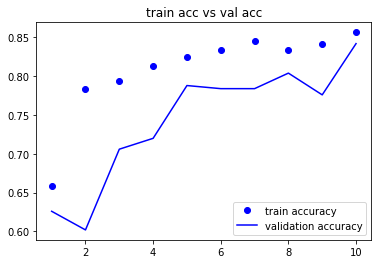

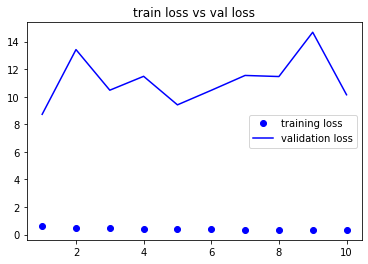

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.



test acc :
 0.8180000185966492


In [ ]:

history = model.fit(train_generator, 
				steps_per_epoch = 75,  
				epochs = 10, 
				validation_data = val_generator, 
				validation_steps = 25)
				
model.save('vgg_cat_n_dog_full.h5')
			
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()



In [ ]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)


Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


25/25 [==============================] - 96s 4s/step - loss: 11.2504 - acc: 0.8020

test acc :
 0.8019999861717224
